In [6]:
import opendatasets as od
import pandas as pd
import zipfile
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import IncrementalPCA
import matplotlib
from matplotlib import pyplot as plt

In [2]:
csv_file = 'C:/Users/aemsh/Desktop/DATA4380/santander-customer-satisfaction/train.csv'

In [3]:
df = pd.read_csv(csv_file)

In [4]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
df.shape

(76020, 371)

In [6]:
df.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

Check for missing variables and duplicates

In [7]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
df.duplicated().sum()

0

Plot

In [7]:
df_0=df[df['TARGET']==0]
df_1=df[df['TARGET']==1]

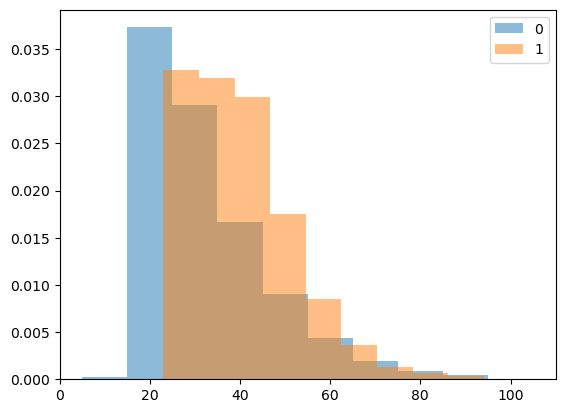

In [8]:
plt.hist(df_0['var15'], density=1, alpha=0.5, label='0')
plt.hist(df_1['var15'], density=1, alpha=0.5, label='1')
plt.legend()

In [20]:
# Drop TARGET and ID column
df.drop(labels=['TARGET'], axis=1, inplace = True)
df.drop(labels=['ID'], axis=1, inplace = True)

Remove outliers using z-score

In [10]:
from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(df)

# Set threshold for z-score
threshold = 3  # Can be adjusted

# Find outliers
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
cleaned_df = df[~outliers]

In [11]:
cleaned_df.shape

(54446, 370)

Feature Scaling

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cleaned_df)

In [13]:
scaled_features[:5]

array([[-1.73404222,  0.03977162, -0.6674114 , ...,  0.        ,
         0.        , -1.0280947 ],
       [-1.73397371,  0.03977162, -0.6674114 , ...,  0.        ,
         0.        , -0.61904722],
       [-1.73376819,  0.03977162, -0.6674114 , ...,  0.        ,
         0.        , -0.31887052],
       [-1.73374535,  0.03977162, -0.25516021, ...,  0.        ,
         0.        , -0.21735379],
       [-1.73365401,  0.03977162, -0.35822301, ...,  0.        ,
         0.        ,  2.0611278 ]])

Dimensionality reduction using PCA

In [49]:
# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components that explain a certain percentage of variance
desired_variance = 0.95  # Example: retain 95% of variance
n_components = np.argmax(cumulative_variance >= desired_variance) + 1

print("Number of components to retain {}% of variance: {}".format(desired_variance * 100, n_components))


Number of components to retain 95.0% of variance: 24


In [16]:
from sklearn.decomposition import IncrementalPCA

# Assuming X is your large dataset with shape (n_samples, n_features)

# Define the batch size for IPCA
batch_size = 1000

# Initialize IPCA with the desired number of components
n_components = 24
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# Iterate over the dataset in batches and fit IPCA incrementally
for i in range(0, len(scaled_features), batch_size):
    X_batch = scaled_features[i:i+batch_size]
    ipca.partial_fit(X_batch)

# Transform the entire dataset using IPCA
X_ipca = ipca.transform(scaled_features)


In [17]:
X_ipca

array([[-2.24127625, -2.97996761,  0.54223204, ..., -0.07029053,
        -0.02873805, -0.00823227],
       [-0.65551857,  1.67377316, -1.03873321, ...,  0.01547648,
         1.06935039,  0.93711552],
       [-2.24713696, -3.0051136 ,  0.55668044, ..., -0.05948843,
        -0.03283442, -0.01062491],
       ...,
       [-0.72455397,  1.45844476, -0.95895168, ..., -0.02068554,
         0.98248097,  0.80585997],
       [-0.61637507,  1.72892256, -1.04147238, ...,  0.00350984,
         0.85911657,  0.76504829],
       [-2.20652902, -3.13581989,  0.83141421, ...,  0.05590412,
         0.08234213, -0.15084273]])

In [18]:
X_ipca.shape

(54446, 24)

In [ ]:
# Perform PCA
#pca = PCA(n_components=24)
#X_pca = pca.fit_transform(scaled_features)

In [ ]:
# Create a DataFrame from the transformed array
#X_pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# X_pca_df now contains the reduced-dimensional data with n_components as columns

In [ ]:
#X_pca_df.head()

In [21]:
#X_pca

array([[-69024788.70826232, -15422089.34391928,  -7759217.87105379,
         -4777394.80295238,    431462.50560968,   -907405.0136469 ],
       [-69024790.10199252, -15422089.3198294 ,  -7759217.85626816,
         -4777394.74779967,    431462.55737557,   -907404.99075877],
       [-69024788.67787842, -15422089.29012009,  -7759217.84595378,
         -4777394.75354722,    431462.65983643,   -907404.93793118],
       ...,
       [-69024788.65159433, -15422089.30659212,  -7759217.79355766,
         -4777394.70823783,    431462.71192386,   -907404.77990588],
       [-69024788.64053038, -15422089.28699456,  -7759217.78445981,
         -4777394.69025757,    431462.76812264,   -907404.75231366],
       [-69024788.60491101, -15422089.22385439,  -7759217.75521568,
         -4777394.6323339 ,    431462.94922422,   -907404.66337477]])

In [22]:
#X_pca_df.shape

(52193, 6)

Feature Scaling

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_pca)

Clustering

In [33]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [25]:
In [7]: kmeans = KMeans(
   ...:     init="random",
   ...:     n_clusters=3,
   ...:     n_init=10,
   ...:     max_iter=300,
   ...:     random_state=42
   ...: )

In [26]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [27]:
# The lowest SSE value
   ...: kmeans.inertia_

7542208.980082072

In [28]:
# Final locations of the centroid
   ...: kmeans.cluster_centers_

array([[ 1.42258362e+00,  7.08358887e-01,  1.39094252e+00,
         4.94338057e+00,  4.14020716e-01,  1.68738224e+00,
        -1.50394980e-02, -1.35022181e-01, -1.44131056e+00,
        -2.03928456e-06,  5.48225869e-08,  1.64257820e-08,
        -6.77102469e-03, -4.27234791e-02,  2.30488665e+00,
         1.28461141e+00,  1.19583002e+00,  2.45881378e-01,
         1.29311412e-01, -2.91781778e-02,  3.54064030e+00,
         1.34654530e+00,  2.94043895e-01, -3.35337748e-01,
         7.44183017e-02, -1.32325673e+00,  6.27356010e+00,
         2.55327470e+00,  4.10777155e-02, -1.89097380e+00,
        -5.11808055e-01, -4.52965697e-01,  2.89595984e-01,
         6.51558599e-01,  9.45108913e-03, -4.47480948e-01,
         4.91462577e-01,  8.91567097e-01,  1.37100424e+00,
        -4.51219818e-01,  1.32632528e+00, -1.81621423e-01,
         1.09110590e+00,  5.62198681e-01, -4.64156530e-01,
         1.04139172e+00,  1.01966786e+00, -2.78241339e-01,
        -3.08764384e-01,  5.32933940e-01,  9.88424879e-0

In [30]:
# The number of iterations required to converge
   ...: kmeans.n_iter_

17

In [31]:
# First five predicted labels
kmeans.labels_[:5]

array([2, 1, 2, 1, 1])

In [34]:
In [13]: kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(scaled_features)
   ...:     sse.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [29]:
from sklearn.cluster import KMeans

k = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_pca)


In [31]:
X_pca.shape

(76020, 101)